In [1]:
#general settings
%matplotlib notebook
%load_ext autoreload
%autoreload 2

/cvmfs/sft.cern.ch/lcg/releases/matplotlib/1.5.1-763af/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pytimber
from pytimber import BSRT

In [6]:
db = pytimber.LoggingDB()

In [31]:
t1=pytimber.parsedate("2016-08-24 03:34:00.000")
t2=pytimber.parsedate("2016-08-24 04:08:00.000")

# Getting the BSRT data from timber

generate the BSRT instance, which automatically calculates the emittances using the data stored in timber.

In [9]:
bsrt = BSRT.fromdb(t1,t2,beam='B1')

Dictionary with emittances and timestamps for each slot

In [13]:
bsrt.emit

array([(1472002447.645, 3.451221778985401, 2.9964924620987827),
       (1472002470.766, 3.503534068077894, 2.933003154332558),
       (1472002491.605, 3.3852197719151698, 2.7549211720602247),
       (1472002514.645, 3.3933059753786536, 2.8714228325039097),
       (1472002537.624, 3.4988308520855433, 3.0300499205333002),
       (1472002558.967, 3.578052412517453, 3.0030449136983193),
       (1472002580.526, 3.4369088377937245, 2.979947749010079),
       (1472002602.825, 3.440375026348834, 2.7949962447418066),
       (1472002625.105, 3.4755651602916044, 2.9838217635826823),
       (1472002647.725, 3.529972389885365, 3.090232709149782),
       (1472002669.525, 3.5445443533196106, 2.822615701692109),
       (1472002693.505, 3.551249889738612, 3.014212052277341),
       (1472002716.545, 3.525736983761412, 3.059324909059721),
       (1472002738.587, 3.6237871064804574, 2.84479952187861),
       (1472002759.947, 3.5886291540890376, 3.201249253691373),
       (1472002782.99, 3.4569226230695866

what slots do we have?

In [40]:
print sorted(bsrt.emit.keys())

[50.0, 62.0, 74.0, 86.0, 300.0, 312.0, 324.0, 336.0, 550.0, 562.0, 574.0, 586.0, 800.0, 812.0, 824.0, 836.0, 1050.0, 1062.0, 1074.0, 1086.0, 1300.0, 1312.0, 1324.0, 1336.0, 1550.0, 1562.0, 1574.0, 1586.0, 1800.0, 1812.0, 1824.0, 1836.0, 2050.0, 2062.0, 2074.0, 2086.0, 2300.0, 2312.0, 2324.0, 2336.0, 2550.0, 2562.0, 2574.0, 2586.0, 3100.0, 3112.0, 3124.0, 3136.0]


# Plotting the data

We can plot the emittance

<IPython.core.display.Javascript object>


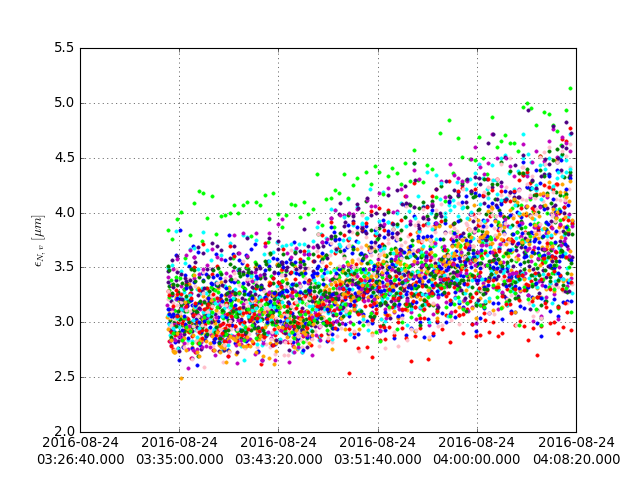

In [20]:
plt.figure()
bsrt.plot(plane='v',t1=t1,t2=t2,slots=None,avg=None,fit=False)

... and we can also perform a moving average over the data

<IPython.core.display.Javascript object>


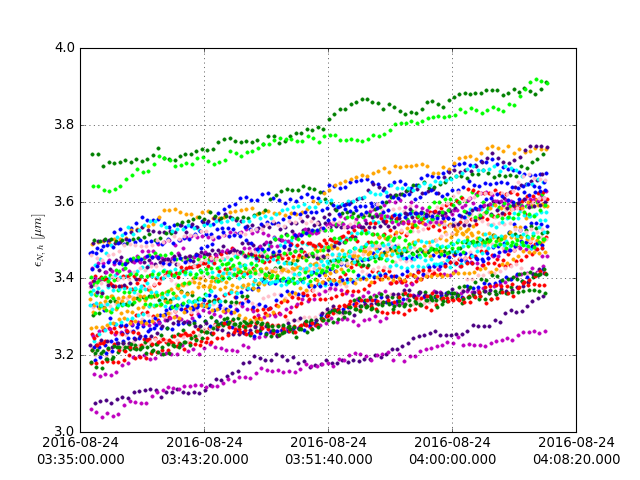

In [21]:
plt.figure()
bsrt.plot(plane='h',t1=t1,t2=t2,slots=None,avg=10,fit=False)

... or plot only specific slots

<IPython.core.display.Javascript object>


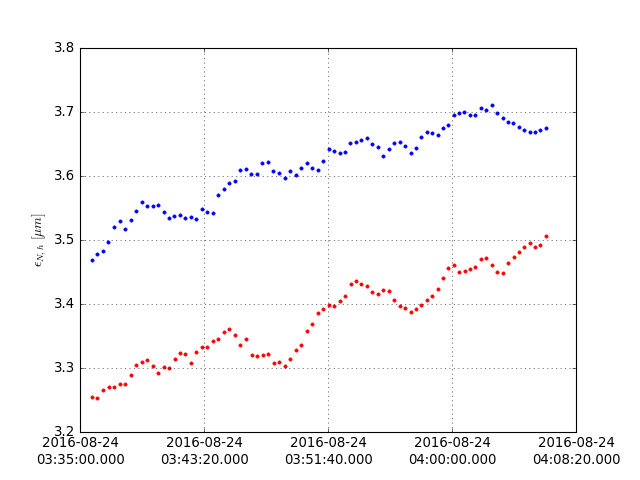

In [22]:
plt.figure()
bsrt.plot(plane='h',t1=t1,t2=t2,slots=[50,62],avg=10,fit=False)

# Fitting the emittance

fit the emittance between tstart and tend

In [26]:
tstart=pytimber.parsedate("2016-08-24 03:45:00.000")
tend=pytimber.parsedate("2016-08-24 04:00:00.000")

The raw data can be also fitted with an exponential:   
$\epsilon(t) = \epsilon_0\cdot e^{((t-t_{\rm start})/\tau)}$

<IPython.core.display.Javascript object>


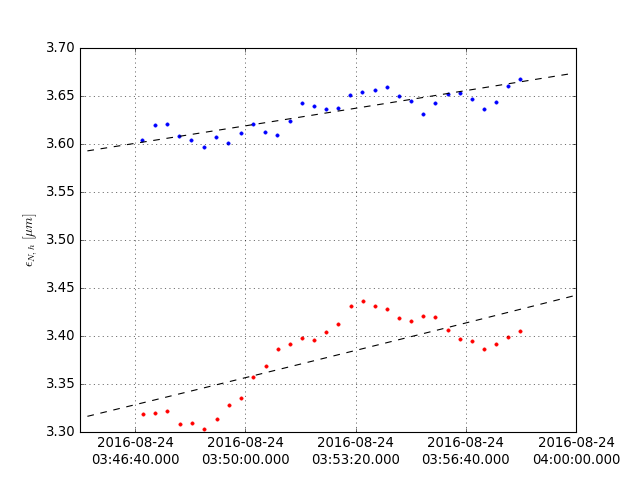

In [27]:
plt.figure()
bsrt.plot(plane='h',t1=tstart,t2=tend,slots=[50,62],avg=10,fit=True)

The fit data from tstart to tend ist then stored in bsrt.emitfit.  

In [28]:
bsrt.emitfit

{50.0: {(1472003100.0,
   1472004000.0): array([ (3.5928334023523734, 0.020034148758304234, 39632.274935301924, 16919.18929755318, 3.0106486627690368, 0.03002051965976216, -39470762976.68924, 2.846364729140598e+16)], 
        dtype=[('ah', '<f8'), ('sigah', '<f8'), ('tauh', '<f8'), ('sigtauh', '<f8'), ('av', '<f8'), ('sigav', '<f8'), ('tauv', '<f8'), ('sigtauv', '<f8')])},
 62.0: {(1472003100.0,
   1472004000.0): array([ (3.316320676641235, 0.02158718678745798, 23753.62839620362, 7065.566806834086, 2.929940467848238, 0.04620767392611412, -2554376289.8299246, 101580394750299.47)], 
        dtype=[('ah', '<f8'), ('sigah', '<f8'), ('tauh', '<f8'), ('sigtauh', '<f8'), ('av', '<f8'), ('sigav', '<f8'), ('tauv', '<f8'), ('sigtauv', '<f8')])},
 74.0: {(1472003100.0,
   1472004000.0): array([ (3.7493134700335373, 0.021310482083194436, 25235.689328307984, 6972.488774727582, 3.258549310783138, 0.036683457023379336, -50091034928.459885, 3.0828561352057228e+16)], 
        dtype=[('ah', '<f8'), ('si

For each (tstart,tend) the fitting data is stored in this dictionary. This means you can e.g. fit your data from [t0,t1], [t1,t2], etc., plot the complete data and then plot the individual fits on top.

In [49]:
t0fit=pytimber.parsedate("2016-08-24 03:34:00.000")
t1fit=pytimber.parsedate("2016-08-24 03:46:00.000")
t2fit=pytimber.parsedate("2016-08-24 03:50:00.000")
t3fit=pytimber.parsedate("2016-08-24 03:57:00.000")
t4fit=pytimber.parsedate("2016-08-24 04:08:00.000")

Here we perform the fit. The function bsrt.plot(..., fit=True) and bsrt.plot_fit() automatically generate this data, if no entry for the desired timestamp is found in bsrt.emitfit. Just to show it, we use here the underlying function bsrt.fit.

In [55]:
for ts,te in [[t0fit,t1fit],[t1fit,t2fit],[t2fit,t3fit],[t3fit,t4fit]]:
    bsrt.fit(ts,te,force=True)

and now we can do the plot

<IPython.core.display.Javascript object>


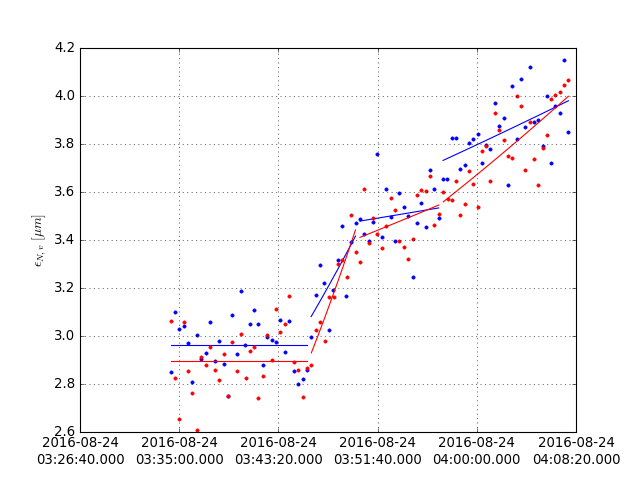

In [60]:
plt.figure()
for slot,c in zip([1062,1074],['b','r']):
    # plot the averaged data
    bsrt.plot(plane='v',t1=t0fit,t2=t4fit,slots=slot,avg=None,fit=False,color=c)
    # now add the fit data with a black line
    for ts,te in [[t0fit,t1fit],[t1fit,t2fit],[t2fit,t3fit],[t3fit,t4fit]]:
        bsrt.plot_fit(plane='v',t1=ts,t2=te,slots = slot, color=c)